In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('manhattan_rents - Data.csv')

In [3]:
df.dropna(inplace = True)

In [4]:
df.reset_index(drop=True, inplace=False)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,1545,2550.0,0.0,1,480.0,9,2.0,17
1,2472,11500.0,2.0,2,2000.0,4,1.0,96
2,2919,4500.0,1.0,1,916.0,2,51.0,29
3,2790,4795.0,1.0,1,975.0,3,8.0,31
4,3946,17500.0,2.0,2,4800.0,3,4.0,136
...,...,...,...,...,...,...,...,...
3531,7582,4210.0,1.0,1,532.0,3,8.0,16
3532,5686,6675.0,2.0,2,988.0,5,10.0,9
3533,9679,1699.0,0.0,1,250.0,2,5.0,96
3534,5188,3475.0,1.0,1,651.0,6,5.0,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3538
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3536 non-null   int64  
 1   rent              3536 non-null   float64
 2   bedrooms          3536 non-null   float64
 3   bathrooms         3536 non-null   int64  
 4   size_sqft         3536 non-null   float64
 5   min_to_subway     3536 non-null   int64  
 6   floor             3536 non-null   float64
 7   building_age_yrs  3536 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 248.6 KB


In [6]:
df.drop(df.index[df['bedrooms'] % 1 != 0], inplace = True)

In [7]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
count,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,5315.760092,5145.065273,1.352992,1.368165,940.033209,4.969081,11.917120,51.748354
std,3311.904873,3158.801567,0.967656,0.600816,476.170764,5.535749,10.987292,39.416701
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000
25%,2417.000000,3175.000000,1.000000,1.000000,615.000000,2.000000,4.000000,15.000000
50%,5096.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000
75%,8121.000000,6000.000000,2.000000,2.000000,1143.000000,6.000000,17.000000,90.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000


In [8]:
def scaleRent (df):
    for row in range(len(df.index)):
        if df.iat[row, 2] == 0:
            df.iat[row, 1] = df.iat[row, 1]/1
        else:
            df.iat[row, 1] = df.iat[row, 1]/df.iat[row, 2]
    return df

In [9]:
df = scaleRent (df)

In [10]:
def normalizingData (df):
    for column in df:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())  
    return df

In [11]:
df = normalizingData (df)

In [12]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,0.136059,0.139489,0.0,0.2,0.050549,0.209302,0.024096,0.094444
1,0.217748,0.390963,0.4,0.4,0.384615,0.093023,0.012048,0.533333
2,0.257138,0.292731,0.2,0.2,0.146374,0.046512,0.614458,0.161111
3,0.245770,0.315914,0.2,0.2,0.159341,0.069767,0.096386,0.172222
4,0.347638,0.626719,0.4,0.4,1.000000,0.069767,0.048193,0.755556


In [13]:
cor = df.corr()

<AxesSubplot:>

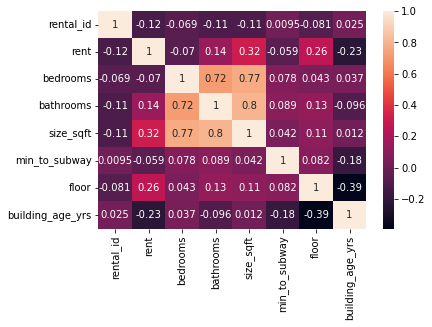

In [14]:
sns.heatmap(cor, annot = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3538
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3493 non-null   float64
 1   rent              3493 non-null   float64
 2   bedrooms          3493 non-null   float64
 3   bathrooms         3493 non-null   float64
 4   size_sqft         3493 non-null   float64
 5   min_to_subway     3493 non-null   float64
 6   floor             3493 non-null   float64
 7   building_age_yrs  3493 non-null   float64
dtypes: float64(8)
memory usage: 245.6 KB


In [16]:
def testTrainSplit (df):
    df = df.sample(frac = 1, ignore_index=True)
    length = len(df.index)
    splitPoint = round(length * 0.70)
    training = df.iloc[:splitPoint, :]
    testing = df.iloc[splitPoint:, :]
    return training, testing

In [17]:
training, testing = testTrainSplit (df)

In [18]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         2445 non-null   float64
 1   rent              2445 non-null   float64
 2   bedrooms          2445 non-null   float64
 3   bathrooms         2445 non-null   float64
 4   size_sqft         2445 non-null   float64
 5   min_to_subway     2445 non-null   float64
 6   floor             2445 non-null   float64
 7   building_age_yrs  2445 non-null   float64
dtypes: float64(8)
memory usage: 152.9 KB


In [19]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 2445 to 3492
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         1048 non-null   float64
 1   rent              1048 non-null   float64
 2   bedrooms          1048 non-null   float64
 3   bathrooms         1048 non-null   float64
 4   size_sqft         1048 non-null   float64
 5   min_to_subway     1048 non-null   float64
 6   floor             1048 non-null   float64
 7   building_age_yrs  1048 non-null   float64
dtypes: float64(8)
memory usage: 65.6 KB


In [20]:
def fittingPlane (df, wBList):
    listOfFits = []
    W3 = -1
    for wBPair in wBList:
        W1 = wBPair["W1"]
        W2 = wBPair["W2"]
        B = wBPair["B"]
        dSum = 0
        for index, row in df.iterrows():
            X1 = row["bedrooms"]
            X2 = row["size_sqft"]
            Y = row["rent"]
            
            distance = (abs((W1 * X1) + (W2 * X2) + (W3 * Y) + B)) / (((W1**2) + (W2**2) + (W3**2))**0.5)
            
            dSum = dSum + distance
        template = {"Distance Sum": dSum, "W1": W1, "W2": W2, "B": B}
        listOfFits.append(template)
    dictionary = findSmallestSum (listOfFits)
    
    return dictionary

In [21]:
def findSmallestSum (listOfFits):
    lowest = float ('inf')
    for sum in listOfFits:
        if sum['Distance Sum'] < lowest:
            lowest = sum['Distance Sum']
            dictionary = sum
    return dictionary

In [22]:
def creatingWeights (lWeight, hWeight, lYIntercept, hYIntercept):
    wBList = []
    for firstWeight in range(lWeight, hWeight + 1):
        for secondWeight in range (lWeight, hWeight + 1):
            for yIntercept in range (lYIntercept, hYIntercept + 1):
                template = {"W1": firstWeight/100, "W2": secondWeight/100, "B" : yIntercept/100}
                wBList.append(template)
    return wBList

In [23]:
wBList = creatingWeights (-10, 100, -10, 100)

In [24]:
dictionary = fittingPlane (df, wBList)

KeyboardInterrupt: 

In [ ]:
dictionary